In [1]:
from run import full_train_test

In [4]:
N_TRAIN_SAMPLES = 60000
N_VALI_SAMPLES = 10000
N_ITER = 5
N_EPOCHS = 20
BATCH_SIZE = 250

Iteration 1
True
Epoch: 1 / 2 
 Train loss: 0.0444 - Test loss:0.0795 
 Train acc: 0.7235 - Test acc: 0.7342
True
Epoch: 2 / 2 
 Train loss: 0.0250 - Test loss:0.0631 
 Train acc: 0.8529 - Test acc: 0.8621


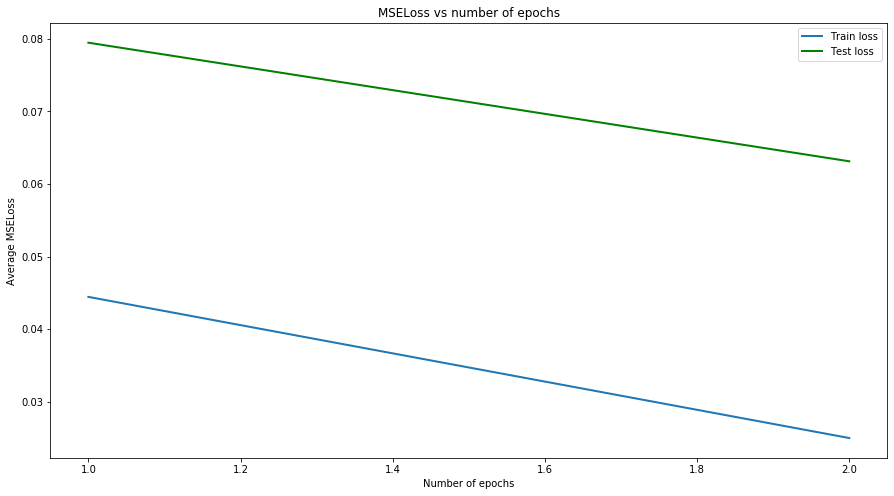

Train accuracy mean = 0.8587833333333333
Test accuracy mean = 0.8608


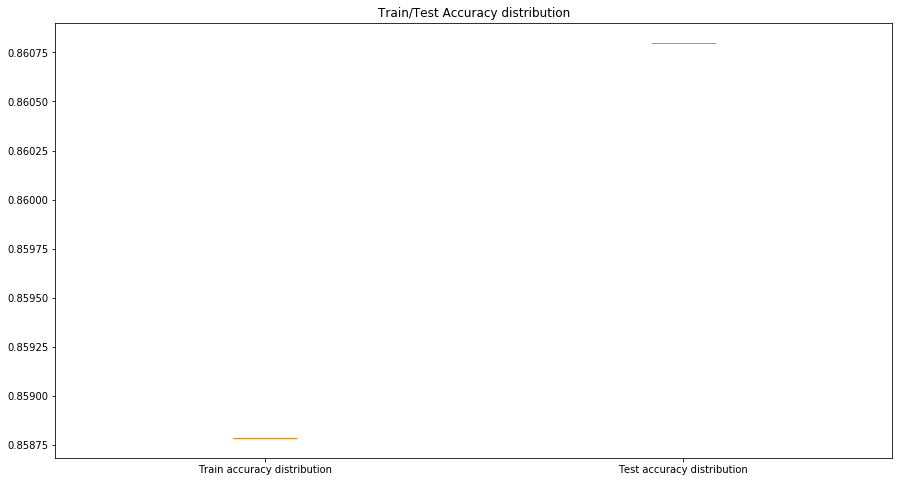

Accuracy: 0.861 +/- 0.000
Iteration time:  38.966 +/- 0.000 seconds


In [6]:
full_train_test("BCD",N_TRAIN_SAMPLES, N_VALI_SAMPLES, N_ITER, N_EPOCHS,d1 = 300, d2 = 300, d3 = 300, verbose = True )

In [10]:
full_train_test("DFW",N_TRAIN_SAMPLES, N_VALI_SAMPLES, N_ITER, N_EPOCHS, BATCH_SIZE, d1 = 1500, d2 = 1500, d3 = 1500,verbose = True)

Iteration 1
Epoch: 1 / 15 
 Train loss: 0.6378 - Test loss:0.6179 
 Train acc: 0.7487 - Test acc: 0.7344
Epoch: 2 / 15 
 Train loss: 0.2214 - Test loss:0.2217 
 Train acc: 0.9147 - Test acc: 0.9156
Epoch: 3 / 15 
 Train loss: 0.1546 - Test loss:0.1547 
 Train acc: 0.9420 - Test acc: 0.9419
Epoch: 4 / 15 
 Train loss: 0.1194 - Test loss:0.1217 
 Train acc: 0.9551 - Test acc: 0.9553
Epoch: 5 / 15 
 Train loss: 0.0964 - Test loss:0.1021 
 Train acc: 0.9643 - Test acc: 0.9620
Epoch: 6 / 15 
 Train loss: 0.0808 - Test loss:0.0900 
 Train acc: 0.9699 - Test acc: 0.9650
Epoch: 7 / 15 
 Train loss: 0.0694 - Test loss:0.0806 
 Train acc: 0.9744 - Test acc: 0.9690
Epoch: 8 / 15 
 Train loss: 0.0596 - Test loss:0.0728 
 Train acc: 0.9783 - Test acc: 0.9721
Epoch: 9 / 15 
 Train loss: 0.0515 - Test loss:0.0664 
 Train acc: 0.9816 - Test acc: 0.9734
Epoch: 10 / 15 
 Train loss: 0.0454 - Test loss:0.0642 
 Train acc: 0.9837 - Test acc: 0.9751


KeyboardInterrupt: 